In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from gb import GBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('../../../data/breast-cancer-wisconsin.csv')

In [3]:
y = df['diagnosis'].map({'M': 1, 'B': 0}).values
X = df.drop(columns=['id', 'diagnosis']).values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=41, stratify=y)

In [ ]:
my_gb = GBRegressor(lr=.0666, n_estimators=55, md=3)
my_gb.fit(X_train, y_train)
my_pr = my_gb.predict(X_test)
my_acc = np.mean(( my_pr > .5  ).astype(int) == y_test)

In [5]:
skl_gb = GradientBoostingRegressor(
    learning_rate=.0666,
    n_estimators=55,
    max_depth=3,
)
skl_gb.fit(X_train, y_train)
skl_pr = skl_gb.predict(X_test)
skl_acc = np.mean(( skl_pr > .5  ).astype(int) == y_test)

In [14]:
train_sc_hist = []
test_sc_hist = []
import tqdm
from sklearn.metrics import accuracy_score
for i in tqdm.tqdm(range(1,55)):

    skl_gb.set_params(n_estimators=i)
    skl_gb.fit(X_train, y_train)
    y_train_pred = skl_gb.predict(X_train)
    y_test_pred = skl_gb.predict(X_test)
    train_sc_hist.append(np.mean(( y_train_pred > .5  ).astype(int) == y_train))
    test_sc_hist.append(np.mean(( y_test_pred > .5  ).astype(int) == y_test))

100%|██████████| 54/54 [00:03<00:00, 14.69it/s]


In [17]:

sk_train_sc_hist = []
sk_test_sc_hist = []
for i in tqdm.tqdm(range(1,55)):
    skl_gb.set_params(n_estimators=i)
    skl_gb.fit(X_train, y_train)
    y_train_pred = skl_gb.predict(X_train)
    y_test_pred = skl_gb.predict(X_test)
    sk_train_sc_hist.append(np.mean(( y_train_pred > .5  ).astype(int) == y_train))
    sk_test_sc_hist.append(np.mean(( y_test_pred > .5  ).astype(int) == y_test))

100%|██████████| 54/54 [00:03<00:00, 14.85it/s]


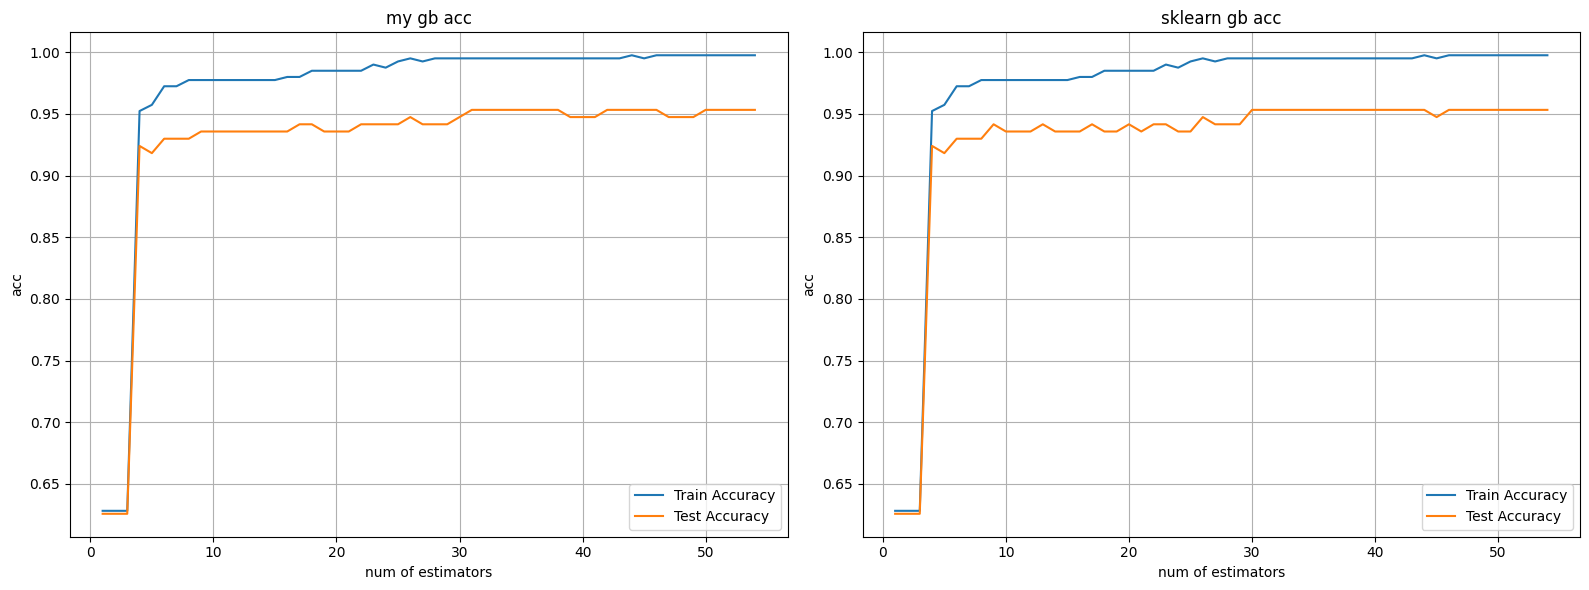

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(range(1, 55), train_sc_hist, label='Train Accuracy')
axes[0].plot(range(1, 55), test_sc_hist, label='Test Accuracy')
axes[0].set_title('my gb acc')
axes[0].set_xlabel('num of estimators')
axes[0].set_ylabel('acc')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(range(1, 55), sk_train_sc_hist, label='Train Accuracy')
axes[1].plot(range(1, 55), sk_test_sc_hist, label='Test Accuracy')
axes[1].set_title('sklearn gb acc')
axes[1].set_xlabel('num of estimators')
axes[1].set_ylabel('acc')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

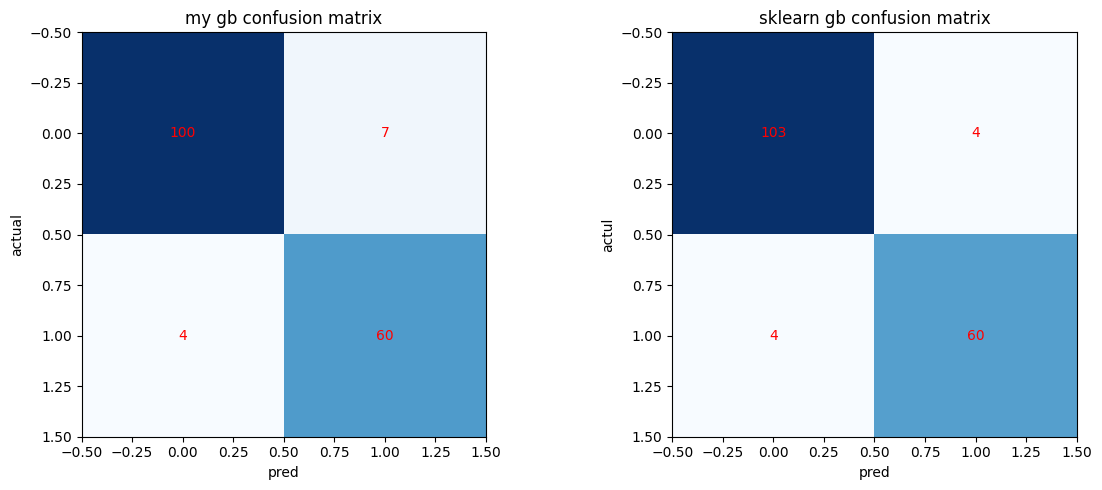

In [21]:
from sklearn.metrics import confusion_matrix

my_conf_matrix = confusion_matrix(y_test, (my_gb.predict(X_test) > 0.5).astype(int))
sk_conf_matrix = confusion_matrix(y_test, (skl_gb.predict(X_test) > 0.5).astype(int))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(my_conf_matrix, cmap='Blues')
axes[0].set_title('my gb confusion matrix')
axes[0].set_xlabel('pred')
axes[0].set_ylabel('actual')
for i in range(my_conf_matrix.shape[0]):
    for j in range(my_conf_matrix.shape[1]):
        axes[0].text(j, i, my_conf_matrix[i, j], ha='center', va='center', color='red')


axes[1].imshow(sk_conf_matrix, cmap='Blues')
axes[1].set_title('sklearn gb confusion matrix')
axes[1].set_xlabel('pred')
axes[1].set_ylabel('actul')
for i in range(sk_conf_matrix.shape[0]):
    for j in range(sk_conf_matrix.shape[1]):
        axes[1].text(j, i, sk_conf_matrix[i, j], ha='center', va='center', color='red')

plt.tight_layout()
plt.show()